<a href="https://colab.research.google.com/github/Ateeth/Deep-Learning/blob/main/ANN4_using_GPU_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test if GPU is *working*

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Which GPU is being used

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3964288670837468254
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18004073872215944207
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

# RAM information

In [3]:
!cat /proc/meminfo

MemTotal:       13297200 kB
MemFree:         8015008 kB
MemAvailable:   11838248 kB
Buffers:          352176 kB
Cached:          3407600 kB
SwapCached:            0 kB
Active:           833796 kB
Inactive:        4089472 kB
Active(anon):        936 kB
Inactive(anon):   914380 kB
Active(file):     832860 kB
Inactive(file):  3175092 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               880 kB
Writeback:             0 kB
AnonPages:       1163600 kB
Mapped:           708228 kB
Shmem:             11468 kB
KReclaimable:     113480 kB
Slab:             155484 kB
SReclaimable:     113480 kB
SUnreclaim:        42004 kB
KernelStack:        5696 kB
PageTables:        11864 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648600 kB
Committed_AS:    4108256 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       54300 kB
VmallocChunk:          0 kB
Percpu:          

# CPU information

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

# MOUNT DRIVE

In [7]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


In [8]:
! pip install -q keras

# Data preprocessing

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ANN/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
X = dataset.iloc[: , 3 : 13]
y = dataset.iloc[: , 13]

In [12]:
geography = pd.get_dummies(X['Geography'] , drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first = True)

In [13]:
X = pd.concat([X , geography , gender] , axis = 1)

In [14]:
X = X.drop(['Geography' , 'Gender'] , axis = 1)

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU , PReLU , ELU
from keras.layers import Dropout

In [18]:
classifier = Sequential()

In [19]:
X.shape

(10000, 11)

In [20]:
classifier.add(Dense(units =  10 , kernel_initializer = 'he_normal' , activation = 'relu' , input_dim = 11))

In [21]:
classifier.add(Dropout(0.3))

In [22]:
classifier.add(Dense(units =  20 , kernel_initializer = 'he_normal' , activation = 'relu' ))

In [23]:
classifier.add(Dropout(0.4))

In [24]:
classifier.add(Dense(units =  15 , kernel_initializer = 'he_normal' , activation = 'relu' ))

In [25]:
classifier.add(Dropout(0.2))

In [26]:
classifier.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid'))

In [27]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [29]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 5s 4ms/step - loss: 0.6118 - accuracy: 0.7378 - val_loss: 0.4681 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5262 - accuracy: 0.7789 - val_loss: 0.4602 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4976 - accuracy: 0.7931 - val_loss: 0.4527 - val_accuracy: 0.7963
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4902 - accuracy: 0.7927 - val_loss: 0.4543 - val_accuracy: 0.7970
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4791 - accuracy: 0.7970 - val_loss: 0.4483 - val_accuracy: 0.7963
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4651 - accuracy: 0.7972 - val_loss: 0.4415 - val_accuracy: 0.7963
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4610 - accuracy: 0.8009 - val_loss: 0.4381 - val_accuracy: 0.7963

In [30]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


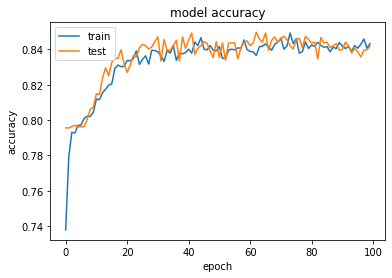

In [31]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

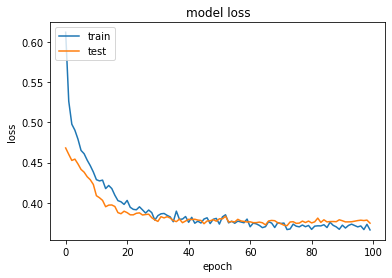

In [32]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1587    8]
 [ 288  117]]


In [35]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.852